In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import json
sns.set(rc={"figure.figsize": (20, 10)})

# Carregando os dados

In [2]:
covid_df = pd.read_excel("../dados/processados/casos_obitos_por_estado.xlsx")
covid_df.columns = ["uf", "casos", "obitos"]
covid_df.set_index("uf", inplace=True)

In [3]:
censo_df = pd.read_excel("../dados/processados/brasil_demografia_censo2010.xlsx")
censo_df.columns = ["uf", "rural", "urbana", "total"]
censo_df.set_index("uf", inplace=True)

In [4]:
economia_df = pd.read_excel("../dados/processados/economia_atlas2013.xlsx")
economia_df.set_index("UFN", inplace=True)

In [5]:
idade_df = pd.read_excel("../dados/processados/espectativa_de_vida_atlas2013.xlsx")
idade_df.set_index("UFN", inplace=True)

In [6]:
saude_df = pd.read_csv("../dados/brutos/lista_insumos_e_leitos_24julho.csv", sep=";")
saude_df.set_index("uf", inplace=True)
print(saude_df.columns)
# Filtrando port colunas de interesse
saude_df = saude_df[["Vacinas aplicadas - influenza ", "Cloroquina - comprimidos", "Respiradores distribuidos", "Leitos UTI habilitados", "Teste PCR", "Teste rápido"]]
saude_df.columns = ["vacinasAplicadas", "cloroquina", "respiradores", "leitosUTI", "testePCR", "testeR"]


Index(['Vacinas distribuidas - influenza', 'Vacinas aplicadas - influenza ',
       'Mascara cirúrgica', 'Mascara N95', 'Alcool em gel - L', 'Avental',
       'Teste rápido', 'Luvas', 'Óculos e protetor facial',
       'Touca e sapatilha', 'Cloroquina - comprimidos',
       'Oseltamivir - cápsulas', 'Teste PCR', 'Leitos locados',
       'Leitos UTI adulto', 'Respiradores distribuidos', 'UTI adulto SUS',
       'Uti adulto não SUS', 'Leitos UTI habilitados', 'Mais Médicos'],
      dtype='object')


In [7]:
# Renomenando siglas para nome do estado
with open("../dados/siglas_estados.json", "r") as f:
    estado2sigla = json.load(f)
sigla2estado = {sigla: estado for estado, sigla in estado2sigla.items()}
saude_df.rename(sigla2estado, inplace=True)

# Combinando tabelas

In [8]:
data_df = covid_df.join(censo_df)
data_df = data_df.join(economia_df)
data_df = data_df.join(idade_df)
data_df = data_df.join(saude_df)

In [9]:
data_df

,casos,obitos,rural,urbana,total,pctPobreza,vulnProbreza,rendaPerCapta,PEA,concRiqueza,A15,A18,A25,A65,vacinasAplicadas,cloroquina,respiradores,leitosUTI,testePCR,testeR
uf,,,,,,,,,,,,,,,,,,,,
São Paulo,143073,9145,1676948,39585251,41262199,4.66,16.13,1084.46,21723910,46.87,32310780,30323379,25391883,3228313,13920763.0,986000.0,645.0,2074.0,323872.0,1660420
Rio de Janeiro,67756,6707,525690,15464239,15989929,7.23,22.26,1039.30,7852543,49.33,12586696,11814446,10017473,1425430,4667421.0,224000.0,737.0,710.0,417760.0,620560
Espírito Santo,19619,832,583480,2931472,3514952,9.53,26.82,815.43,1832872,45.87,2693846,2511810,2071379,248796,1194323.0,78000.0,120.0,165.0,90488.0,135760
Bahia,28250,879,3914430,10102476,14016906,28.72,52.71,496.73,6581418,51.05,10417051,9597387,7787985,1013309,3733629.0,41000.0,200.0,275.0,108592.0,509020
Distrito Federal,16623,214,87950,2482210,2570160,4.93,16.00,1715.11,1408410,49.26,1961144,1829600,1494808,127625,920658.0,72000.0,50.0,185.0,112548.0,151740
Alagoas,15707,601,822634,2297860,3120494,34.29,59.76,432.56,1261201,51.76,2207366,2012326,1605052,187531,921442.0,412000.0,70.0,154.0,84004.0,107420
Minas Gerais,15712,376,2882114,16715216,19597330,10.97,28.85,749.69,9973375,45.98,15174142,14134428,11727697,1591549,6856803.0,85000.0,130.0,423.0,165640.0,783960
Rio Grande do Sul,12135,286,1593638,9100291,10693929,6.37,18.65,959.24,5831829,43.90,8419828,7890893,6682390,989885,3899057.0,49000.0,130.0,624.0,114944.0,493680
Pernambuco,40242,3305,1744238,7052210,8796448,27.17,51.86,525.64,3843266,52.57,6532393,6038351,4902899,648719,2628237.0,223000.0,122.0,644.0,118720.0,320120


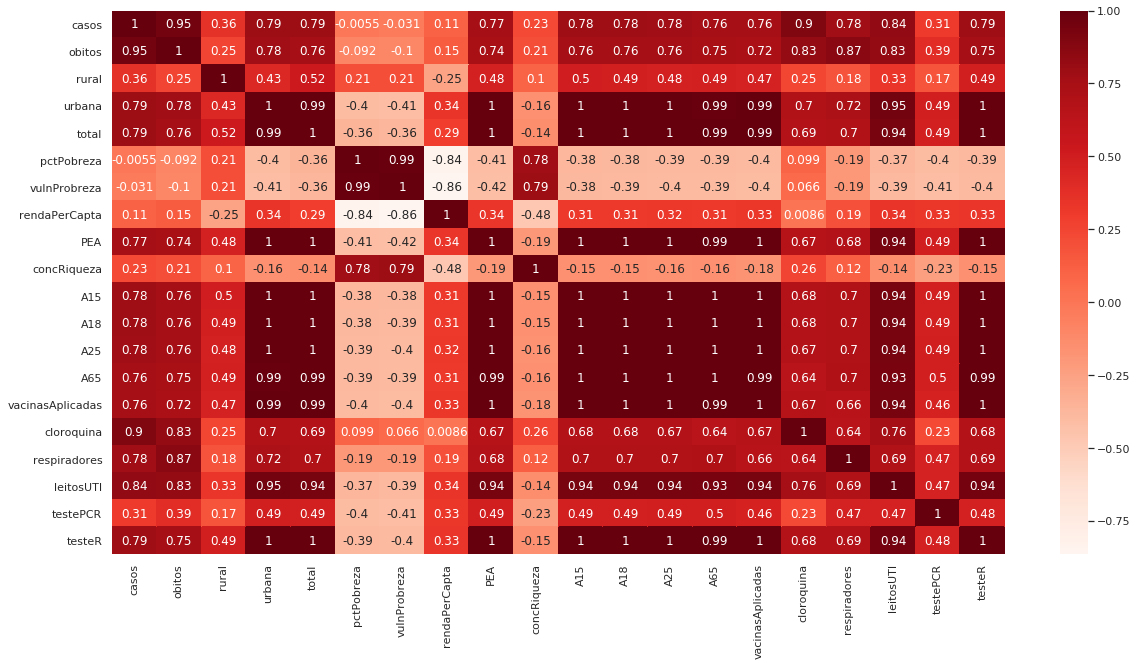

In [10]:
correlation = data_df.corr()
sns.heatmap(correlation, annot=True, cmap=plt.cm.Reds)

# Combinando resultados um único DataFrame

In [11]:
correlation_df = pd.DataFrame(index=data_df.columns, columns=["casosCor", "obitosCor"])
correlation_df["casosCor"] = correlation["casos"][correlation_df.index]
correlation_df["obitosCor"] = correlation["obitos"][correlation_df.index]

# Analisando casos

In [12]:
correlation_df.sort_values("casosCor", ascending=False, inplace=True)
correlation_df[["casosCor"]]

,casosCor
casos,1.000000
obitos,0.952086
cloroquina,0.900049
leitosUTI,0.835094
urbana,0.792893
total,0.791097
testeR,0.785230
A15,0.783490
A18,0.782402
respiradores,0.779316


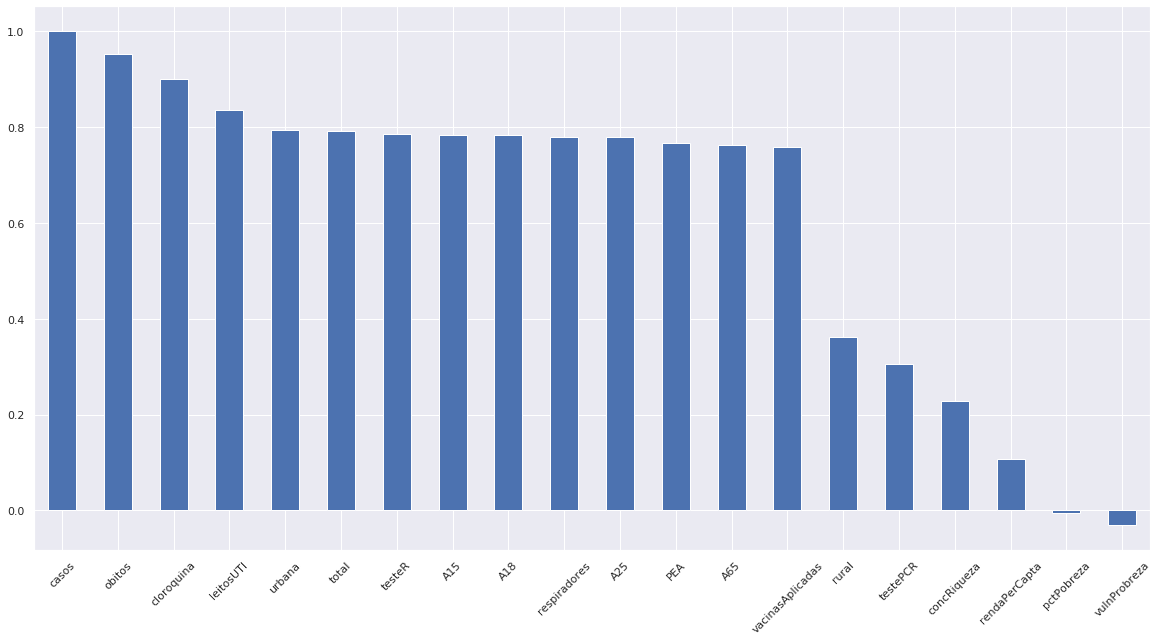

In [13]:
correlation_df["casosCor"].plot.bar(rot=45)

# Analisando óbitos

In [14]:
correlation_df.sort_values("obitosCor", ascending=False, inplace=True)
correlation_df[["obitosCor"]]

,obitosCor
obitos,1.000000
casos,0.952086
respiradores,0.867549
cloroquina,0.827041
leitosUTI,0.825378
urbana,0.775402
total,0.762066
A15,0.758256
A18,0.758063
A25,0.756991


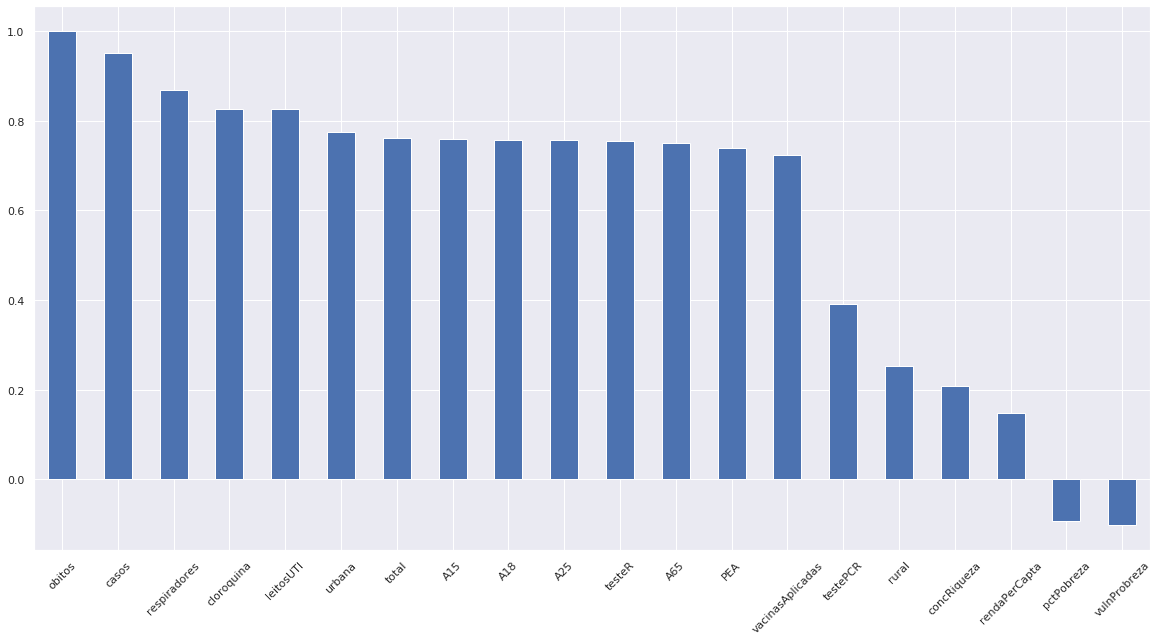

In [15]:
correlation_df["obitosCor"].plot.bar(rot=45)

# Buscando por regiões de risco

In [16]:
TOPP = 15
TOPK = 7

In [17]:
data_df[["casos", "obitos"]].sort_values(by="casos", ascending=False).head(10)

,casos,obitos
uf,,
São Paulo,143073,9145
Rio de Janeiro,67756,6707
Ceará,64271,3982
Pará,54798,3714
Amazonas,49269,2250
Maranhão,48537,1208
Pernambuco,40242,3305
Bahia,28250,879
Paraíba,20310,484


In [18]:
pop_urbana_df = data_df.sort_values(by=["urbana"], ascending=False).head(TOPP)
mais_populosos = pop_urbana_df.index.to_list()

In [19]:
mais_populosos

['São Paulo',
 'Minas Gerais',
 'Rio de Janeiro',
 'Bahia',
 'Rio Grande do Sul',
 'Paraná',
 'Pernambuco',
 'Ceará',
 'Goiás',
 'Santa Catarina',
 'Pará',
 'Maranhão',
 'Espírito Santo',
 'Paraíba',
 'Amazonas']

In [20]:
com_menos_leitos = pop_urbana_df.sort_values(by="leitosUTI").head(TOPK).index.to_list()
pop_urbana_df[["casos", "obitos", "leitosUTI"]].sort_values(by="leitosUTI")

,casos,obitos,leitosUTI
uf,,,
Goiás,5898,173,159.0
Espírito Santo,19619,832,165.0
Paraíba,20310,484,170.0
Amazonas,49269,2250,194.0
Maranhão,48537,1208,238.0
Bahia,28250,879,275.0
Pará,54798,3714,336.0
Santa Catarina,11565,171,372.0
Ceará,64271,3982,402.0


In [21]:
com_menos_leitos

['Goiás', 'Espírito Santo', 'Paraíba', 'Amazonas', 'Maranhão', 'Bahia', 'Pará']

In [22]:
com_menos_testes = pop_urbana_df.sort_values(by="testePCR").head(TOPK).index.to_list()
pop_urbana_df[["casos", "obitos", "testePCR"]].sort_values(by="testePCR")

,casos,obitos,testePCR
uf,,,
Paraíba,20310,484,84748.0
Maranhão,48537,1208,86212.0
Goiás,5898,173,87088.0
Espírito Santo,19619,832,90488.0
Amazonas,49269,2250,100896.0
Santa Catarina,11565,171,103920.0
Bahia,28250,879,108592.0
Rio Grande do Sul,12135,286,114944.0
Ceará,64271,3982,118032.0


In [23]:
com_menos_testes

['Paraíba',
 'Maranhão',
 'Goiás',
 'Espírito Santo',
 'Amazonas',
 'Santa Catarina',
 'Bahia']

In [24]:
com_menos_respiradores = pop_urbana_df.sort_values(by="respiradores").head(TOPK).index.to_list()
pop_urbana_df[["casos", "obitos", "respiradores"]].sort_values(by="respiradores")

,casos,obitos,respiradores
uf,,,
Santa Catarina,11565,171,17.0
Ceará,64271,3982,105.0
Paraná,6897,237,120.0
Espírito Santo,19619,832,120.0
Pernambuco,40242,3305,122.0
Minas Gerais,15712,376,130.0
Rio Grande do Sul,12135,286,130.0
Maranhão,48537,1208,135.0
Goiás,5898,173,160.0


In [25]:
com_menos_respiradores

['Santa Catarina',
 'Ceará',
 'Paraná',
 'Espírito Santo',
 'Pernambuco',
 'Minas Gerais',
 'Rio Grande do Sul']

# Determinando estados com menos insumos no geral (Supondo que a deficiência de insumos seja prejudicial)

In [26]:
com_menos_leitos = set(com_menos_leitos)
com_menos_respiradores = set(com_menos_respiradores)
com_menos_testes = set(com_menos_testes)

In [27]:
risco = com_menos_leitos & com_menos_respiradores & com_menos_testes

In [28]:
risco

{'Espírito Santo'}